# NumPy速習
数値計算

In [24]:
import numpy as np

In [20]:
# ベクトルを定義 二重括弧で定義することに注意
x = np.array([[1,2,3]])
y = np.array([[2,3.9,6.1]])

In [21]:
# データの中心化 (平均値で引く)
# 平均の算出 .mean()
xc = x - x.mean()
yc = y - y.mean()

### 評価関数が最小となるパラメータ

$$a = \frac{\sum_{n=1}^{N}x_{n}y_{n}}{\sum_{n=1}^{N}x_{n}^{2}}$$

In [23]:
a = (xc * yc).sum() / (xc * xc).sum()
a

2.05

# Pandas速習

データの操作。SQLとの連携、csvの読み込み

In [25]:
import pandas as pd

In [37]:
# pandasで読み込んだcsvはデータフレームと呼ばれる
df = pd.read_csv("./kikagaku/sample.csv")

In [38]:
df

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0
3,36.822,96500.0
4,37.002,100500.0
...,...,...
95,47.250,250000.0
96,43.722,166500.0
97,42.642,151500.0
98,43.644,173000.0


In [57]:
# 行と列が複数あるデータは pandas.core.frame.DataFrame
type(df)

pandas.core.frame.DataFrame

In [41]:
# 先頭から n 行表示
df.head(3)

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0


In [42]:
# 末尾から n 行表示
df.tail(3)

,x,y
97,42.642,151500.0
98,43.644,173000.0
99,41.850,174500.0


In [45]:
# 行で区切って表示 (スライスと同じ)
df[3:5]

,x,y
3,36.822,96500.0
4,37.002,100500.0


In [46]:
# 行と列を指定して取得
# .iloc[行, 列]
df.iloc[1, 1]

132500.0

In [48]:
# xカラムの値を10個取得
df.iloc[:10, 0]

0    40.362
1    40.686
2    38.430
3    36.822
4    37.002
5    35.106
6    35.016
7    36.762
8    38.844
9    37.374
Name: x, dtype: float64

In [51]:
# すべてのカラムの値を５個取得
df.iloc[:5, :]

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0
3,36.822,96500.0
4,37.002,100500.0


In [52]:
# カラム名を指定して値を取得
df["x"]

0     40.362
1     40.686
2     38.430
3     36.822
4     37.002
       ...  
95    47.250
96    43.722
97    42.642
98    43.644
99    41.850
Name: x, Length: 100, dtype: float64

In [53]:
x = df["x"]
y = df["y"]

In [59]:
# 1列のデータは pandas.core.series.Series (複数集まればDataFrame)
type(x)

pandas.core.series.Series

# Matplotlib速習
データの可視化

In [60]:
import matplotlib.pyplot as plt

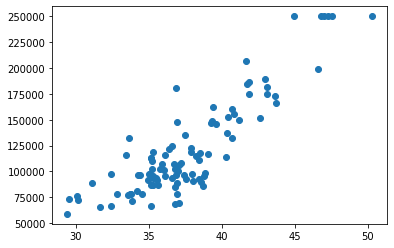

In [63]:
# 散布図: scatter
plt.scatter(x, y)
plt.show()

Text(0, 0.5, 'x')

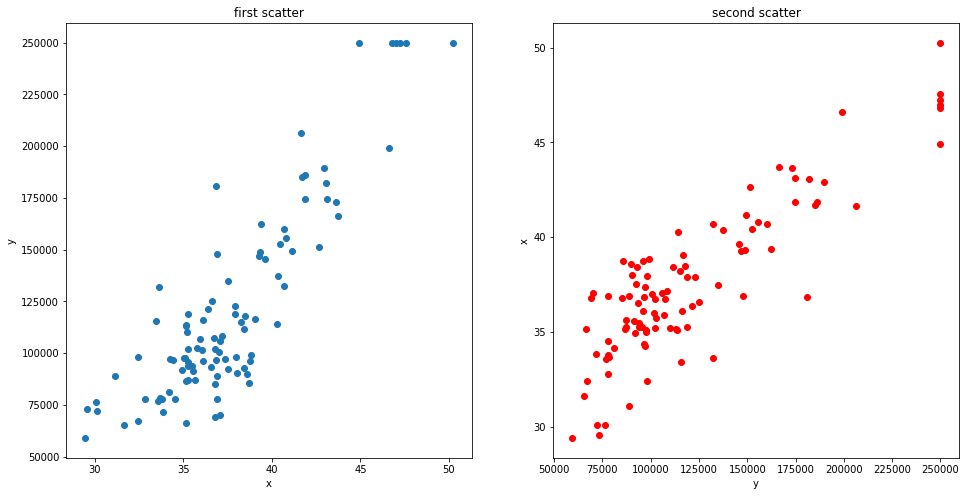

In [75]:
# 少し実践的な描画

# 画像のサイズ指定(x, y)
fig = plt.figure(figsize=(16, 8))

# add_subplot(1, 2, 1)は1行2列のキャンバスの１つ目を使うという意味
ax = fig.add_subplot(1, 2, 1)
bx = fig.add_subplot(1, 2, 2)

# 描画 (cはドットの色)
ax.scatter(x, y);
bx.scatter(y, x, c="red");

# タイトルの記述
ax.set_title("first scatter")
bx.set_title("second scatter")

# ラベル
ax.set_xlabel("x")
ax.set_ylabel("y")
bx.set_xlabel("y")
bx.set_ylabel("x")

# ■ 単回帰分析


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv("kikagaku/sample.csv")

In [78]:
df.head(3)

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0


## データの中心化

In [79]:
# describe() で代表的な統計量を一覧で表示
df.describe()

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [80]:
# 平均値
df.mean()

x        37.62222
y    121065.00000
dtype: float64

In [83]:
# それぞれから平均値を引く
df_c = df - df.mean()
df_c

,x,y
0,2.73978,16435.0
1,3.06378,11435.0
2,0.80778,-28065.0
3,-0.80022,-24565.0
4,-0.62022,-20565.0
...,...,...
95,9.62778,128935.0
96,6.09978,45435.0
97,5.01978,30435.0
98,6.02178,51935.0


In [87]:
# 中心化できているか確認
df_c.describe()

,x,y
count,1.000000e+02,100.000000
mean,1.989520e-15,0.000000
std,4.087547e+00,47174.009226
min,-8.204220e+00,-62065.000000
25%,-2.471220e+00,-30690.000000
50%,-7.132200e-01,-16815.000000
75%,1.817280e+00,26185.000000
max,1.262778e+01,128935.000000


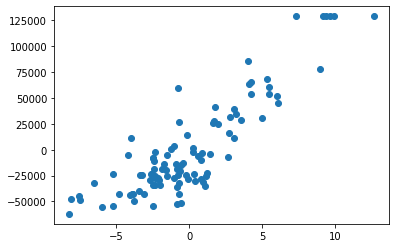

In [89]:
# 散布図で中心家できているかを確認
X = df_c["x"]
Y = df_c["y"]
plt.scatter(X, Y);

## 【演習】パラメータaの計算

$$
a = \frac{\sum_{n=1}^{N}x_{n}y_{n}}{\sum_{n=1}^{N}x_{n}^{2}}
$$

In [91]:
a = (X * Y).sum() / (X * X).sum()
a

10069.022519284063

# 結果のプロット

$$
\hat{y} = ax
$$

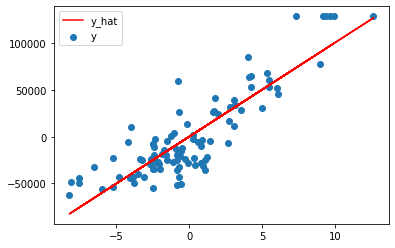

In [100]:
# 求めたaがどの程度確からしいかを見てみる
plt.scatter(X, Y, label="y"); # 実数値を散布図で表示
plt.plot(X, a*X, c="red", label="y_hat"); # 予測値を直線で表示
plt.legend(); # 凡例の表示

## 予測

中心化を考慮するのを忘れずに!

$$
y - \bar{y} = a(x - \bar{x})
$$
$$
y = a(x - \bar{x})+ \bar{y}
$$

In [104]:
# 40平米の家賃の予測
x_new = 40

# 中心化を考慮
mean = df.mean()
print(mean)
xc_new = x_new - mean["x"]

# 予測
yc_hat = a * xc_new

# 中心化を戻す
y_hat = yc_hat + mean['y']
y_hat


x        37.62222
y    121065.00000
dtype: float64


145006.92036590326

## 予測値を算出する関数を作成

In [105]:
def predict(x):
    # 定数項
    a = 10069.022519284063
    xm = 37.62222
    ym = 121065.0
    # 中心化
    xc = x - xm
    # 予測
    y_hat = a * xc + ym
    return y_hat
    

In [109]:
predict(40)

145006.92036590326

In [110]:
predict(30)

44316.695173062646

In [111]:
# 外挿
predict(20)

-56373.53001977797